In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://www.worldometers.info/coronavirus/"

In [3]:
response = requests.get(url)
print(response)

<Response [200]>


In [4]:
soup=BeautifulSoup(response.content, "html.parser")

In [5]:
soup.title

<title>Coronavirus Update (Live): 3,671,812 Cases and 253,241 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [6]:
divs=soup.find("div", class_="panel_flip")
for i in divs.find_all("div", class_="panel_front"):
    print(i.text)


2,207,361
Currently Infected Patients


2,157,781 (98%)
in Mild Condition

49,580 (2%)
Serious or Critical


Show Graph



In [7]:
coronatable=soup.find_all("table")

In [9]:
coronatable

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">Active<br>Cases</br></th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th style="display:none" width="30">Continent</th>
 </tr>
 </thead>
 <tbody>
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>1,322,033</td>
 <td>+2,996</td>
 <td>76,950</td>
 <td>+176</td>
 <td>234,977

In [10]:
len(coronatable)

2

In [11]:
co=coronatable[0]

In [12]:
country = []
total_cases = []
new_cases=[]
total_death=[]
new_Death = []
Total_Recovered = []
rows = co.find_all("tr")[9:-8]
for row in rows:
    col = row.find_all("td")
    country.append(col[0].text.strip())
    total_cases.append(col[1].text.strip())
    new_cases.append(col[2].text.strip())
    total_death.append(col[3].text.strip())
    new_Death.append(col[4].text.strip())
    Total_Recovered.append(col[5].text.strip())
    
    
    
print(country)
print(total_cases)
print(new_cases)
print(total_death)
print(new_Death)
print(Total_Recovered)

['USA', 'Spain', 'Italy', 'UK', 'France', 'Germany', 'Russia', 'Turkey', 'Brazil', 'Iran', 'Canada', 'Belgium', 'Peru', 'India', 'Netherlands', 'Ecuador', 'Saudi Arabia', 'Switzerland', 'Portugal', 'Mexico', 'Sweden', 'Ireland', 'Pakistan', 'Chile', 'Singapore', 'Belarus', 'Qatar', 'Israel', 'Austria', 'UAE', 'Japan', 'Poland', 'Romania', 'Ukraine', 'Indonesia', 'Bangladesh', 'S. Korea', 'Denmark', 'Philippines', 'Serbia', 'Dominican Republic', 'Colombia', 'Norway', 'Czechia', 'Panama', 'South Africa', 'Australia', 'Egypt', 'Malaysia', 'Kuwait', 'Finland', 'Morocco', 'Argentina', 'Algeria', 'Moldova', 'Kazakhstan', 'Luxembourg', 'Bahrain', 'Afghanistan', 'Hungary', 'Thailand', 'Nigeria', 'Oman', 'Ghana', 'Greece', 'Armenia', 'Iraq', 'Uzbekistan', 'Croatia', 'Cameroon', 'Azerbaijan', 'Bosnia and Herzegovina', 'Iceland', 'Estonia', 'Guinea', 'Bulgaria', 'Bolivia', 'Cuba', 'North Macedonia', 'New Zealand', 'Slovenia', 'Ivory Coast', 'Lithuania', 'Slovakia', 'Senegal', 'Honduras', 'Djibout

In [13]:
col

[<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>,
 <td style="font-weight: bold; text-align:right">82,881</td>,
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+1</td>,
 <td style="font-weight: bold; text-align:right;">4,633 </td>,
 <td style="font-weight: bold; 
                                     text-align:right;"></td>,
 <td style="font-weight: bold; text-align:right">77,853</td>,
 <td style="text-align:right;font-weight:bold;">395</td>,
 <td style="font-weight: bold; text-align:right">29</td>,
 <td style="font-weight: bold; text-align:right">58</td>,
 <td style="font-weight: bold; text-align:right">3</td>,
 <td style="font-weight: bold; text-align:right"></td>,
 <td style="font-weight: bold; text-align:right"></td>,
 <td data-continent="Asia" style="display:none">Asia</td>]

In [14]:
df=pd.DataFrame(list(zip(country, total_cases,new_cases,total_death, new_Death, Total_Recovered)), 
                columns=["Country","Total_Cases","New_Cases","total_death","new_Death","Total_Recovered"])
df

,Country,Total_Cases,New_Cases,total_death,new_Death,Total_Recovered
0,USA,"1,214,023","+1,188","69,974",+53,"188,069"
1,Spain,"250,561","+2,260","25,613",+185,"154,718"
2,Italy,"211,938",,"29,079",,"82,879"
3,UK,"190,584",,"28,734",,N/A
4,France,"169,462",,"25,201",,"51,371"
5,Germany,"166,199",+47,"6,993",,"135,100"
6,Russia,"155,370","+10,102","1,451",+95,"19,865"
7,Turkey,"127,659",,"3,461",,"68,166"
8,Brazil,"108,620",+354,"7,367",+24,"45,815"
9,Iran,"99,970","+1,323","6,340",+63,"80,475"


In [15]:
df.dtypes

Country            object
Total_Cases        object
New_Cases          object
total_death        object
new_Death          object
Total_Recovered    object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
Country            214 non-null object
Total_Cases        214 non-null object
New_Cases          214 non-null object
total_death        214 non-null object
new_Death          214 non-null object
Total_Recovered    214 non-null object
dtypes: object(6)
memory usage: 10.1+ KB


In [17]:
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)
df.replace(np.nan,0, inplace = True)
df

,Country,Total_Cases,New_Cases,total_death,new_Death,Total_Recovered
0,USA,"1,214,023","+1,188","69,974",+53,"188,069"
1,Spain,"250,561","+2,260","25,613",+185,"154,718"
2,Italy,"211,938",0,"29,079",0,"82,879"
3,UK,"190,584",0,"28,734",0,N/A
4,France,"169,462",0,"25,201",0,"51,371"
5,Germany,"166,199",+47,"6,993",0,"135,100"
6,Russia,"155,370","+10,102","1,451",+95,"19,865"
7,Turkey,"127,659",0,"3,461",0,"68,166"
8,Brazil,"108,620",+354,"7,367",+24,"45,815"
9,Iran,"99,970","+1,323","6,340",+63,"80,475"


In [18]:
new_cases1 = []
new_death = []
for i in df["New_Cases"]:
    s=str(i)
    s1 = s.replace("+", "")
    s2 = s1.replace(",", "")
    s3 = int(s2)
    new_cases1.append(s3)
    
for i in df["new_Death"]:
    s=str(i)
    s4 = s.replace("+", "")
    s5 = s4.replace(",", "")
    s6 = int(s5)
    new_death.append(s3)
    
print(new_cases1)
print(new_death)

[1188, 2260, 0, 0, 0, 47, 10102, 0, 354, 1323, 0, 242, 0, 39, 317, 0, 1595, 28, 178, 1434, 495, 0, 560, 0, 632, 861, 951, 22, 29, 462, 0, 236, 325, 366, 484, 786, 3, 151, 199, 120, 0, 0, 0, 22, 190, 0, 24, 0, 30, 526, 85, 100, 0, 0, 0, 130, 0, 146, 330, 30, 1, 0, 98, 0, 0, 112, 0, 15, 11, 0, 76, 20, 0, 8, 0, 37, 87, 0, 8, 0, 6, 0, 4, 8, 58, 123, 0, 0, 0, 0, 0, 13, 17, 100, 9, 0, 0, 0, 0, 1, 27, 0, 23, 0, 0, 0, 32, 11, 7, 32, 16, 0, 45, 2, 0, 2, 0, 0, 0, 19, 0, 0, 4, 4, 0, 0, 1, 0, 63, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [19]:
df = pd.DataFrame(list(zip(country, total_cases,total_death, new_cases1,new_death,Total_Recovered)), columns = ["country", "Total_Cases","Total_Death" ,"New_Cases", "New_Death", "Total_Recovered"])
df

,country,Total_Cases,Total_Death,New_Cases,New_Death,Total_Recovered
0,USA,"1,214,023","69,974",1188,1,"188,069"
1,Spain,"250,561","25,613",2260,1,"154,718"
2,Italy,"211,938","29,079",0,1,"82,879"
3,UK,"190,584","28,734",0,1,N/A
4,France,"169,462","25,201",0,1,"51,371"
5,Germany,"166,199","6,993",47,1,"135,100"
6,Russia,"155,370","1,451",10102,1,"19,865"
7,Turkey,"127,659","3,461",0,1,"68,166"
8,Brazil,"108,620","7,367",354,1,"45,815"
9,Iran,"99,970","6,340",1323,1,"80,475"


In [1]:
url_Ind = "https://www.worldometers.info/coronavirus/country/india/"

In [5]:
reponse_ind = requests.get(url_Ind)
print(reponse_ind)

<Response [200]>



<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India Coronavirus: 27,977 Cases and 884 Deaths - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="a
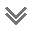

In [8]:
soup_ind = BeautifulSoup(reponse_ind.content, "html.parser")
soup_ind

In [9]:
soup_ind.title

<title>India Coronavirus: 27,977 Cases and 884 Deaths - Worldometer</title>

In [20]:
df

,country,Total_Cases,Total_Death,New_Cases,New_Death,Total_Recovered
0,USA,"1,214,023","69,974",1188,1,"188,069"
1,Spain,"250,561","25,613",2260,1,"154,718"
2,Italy,"211,938","29,079",0,1,"82,879"
3,UK,"190,584","28,734",0,1,N/A
4,France,"169,462","25,201",0,1,"51,371"
5,Germany,"166,199","6,993",47,1,"135,100"
6,Russia,"155,370","1,451",10102,1,"19,865"
7,Turkey,"127,659","3,461",0,1,"68,166"
8,Brazil,"108,620","7,367",354,1,"45,815"
9,Iran,"99,970","6,340",1323,1,"80,475"


In [2]:
temp = pd.read_excel(r"C:/Users/27703/Documents/Other/Corona/Covid_TimeSeries.xlsx")
print(temp) #Loading India Data

         Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0  2020-01-30                1                1                0   
1  2020-01-31                0                1                0   
2  2020-02-01                0                1                0   
3  2020-02-02                1                2                0   
4  2020-02-03                1                3                0   
5  2020-02-04                0                3                0   
6  2020-02-05                0                3                0   
7  2020-02-06                0                3                0   
8  2020-02-07                0                3                0   
9  2020-02-08                0                3                0   
10 2020-02-09                0                3                0   
11 2020-02-10                0                3                0   
12 2020-02-11                0                3                0   
13 2020-02-12                0                3 

In [35]:
temp.head() #EDA

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,43860,1,1,0,0,0,0
1,43861,0,1,0,0,0,0
2,43862,0,1,0,0,0,0
3,43863,1,2,0,0,0,0
4,43864,1,3,0,0,0,0


In [53]:
temp.tail() #EDA

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
93,2020-05-02,2564,39826,831,10852,92,1323
94,2020-05-03,2952,42778,911,11763,140,1463
95,2020-05-04,3656,46434,1082,12845,103,1566
96,2020-05-05,2971,49405,1295,14140,128,1694
97,2020-05-06,3602,53007,1191,15331,91,1785


In [39]:
temp.describe() #EDA

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,43908.500000,540.887755,7437.612245,156.438776,1654.428571,18.214286,242.836735
std,28.434134,855.833312,13037.002846,297.333097,3460.838612,30.016920,433.980894
min,43860.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,43884.250000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000
50%,43908.500000,26.000000,184.500000,1.500000,17.500000,1.000000,3.500000
75%,43932.750000,866.750000,9021.500000,136.500000,1057.500000,27.000000,321.500000
max,43957.000000,3656.000000,53007.000000,1295.000000,15331.000000,140.000000,1785.000000


In [42]:
temp.info() #EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
Date               98 non-null int64
Daily Confirmed    98 non-null int64
Total Confirmed    98 non-null int64
Daily Recovered    98 non-null int64
Total Recovered    98 non-null int64
Daily Deceased     98 non-null int64
Total Deceased     98 non-null int64
dtypes: int64(7)
memory usage: 5.4 KB


In [47]:
temp.dtypes#EDA

Date               int64
Daily Confirmed    int64
Total Confirmed    int64
Daily Recovered    int64
Total Recovered    int64
Daily Deceased     int64
Total Deceased     int64
dtype: object

In [5]:
Y = pd.DataFrame(columns=['Date','Daily Confirmed'], data=temp[['Date','Daily Confirmed']].values)
#Assigning to a Diff Dataframe

In [6]:
Y.columns = ['Date', 'Daily_Confirmed'] #Renaming to remove space header from column

In [84]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
Date               98 non-null object
Daily_Confirmed    98 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [7]:
Y.Date = pd.to_datetime(Y.Date) #Converting to DateTime
Y.Daily_Confirmed = pd.to_numeric(Y.Daily_Confirmed) #Converting to Int

In [110]:
Y.info() #EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
Date               98 non-null datetime64[ns]
Daily_Confirmed    98 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [113]:
Y.isnull() #EDA

,Date,Daily_Confirmed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [99]:
Y = Y.tail() #EDA

In [7]:
Y.head() #EDA

,Date,Daily_Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


Plotting Data For India

In [14]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

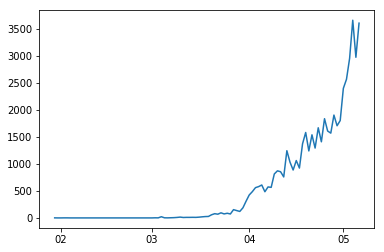

In [31]:
IndGraph = plt.plot(Y['Date'] ,Y['Daily_Confirmed'])

ax = plt.gca()
formatter = mdates.DateFormatter("%m")

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [32]:
temp.columns = ['Date','Daily_Confirmed','Total_Confirmed','Daily_Recovered',
                'Total_Recovered','Daily_Deceased','Total_Deceased']

In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
Date               98 non-null datetime64[ns]
Daily_Confirmed    98 non-null int64
Total_Confirmed    98 non-null int64
Daily_Recovered    98 non-null int64
Total_Recovered    98 non-null int64
Daily_Deceased     98 non-null int64
Total_Deceased     98 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.4 KB


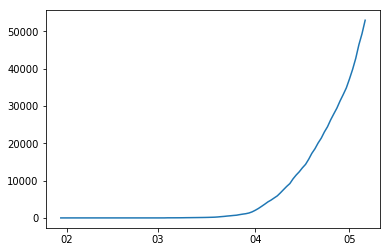

In [41]:
IndGraphTot = plt.plot(temp['Date'] ,temp['Total_Confirmed'])

ax = plt.gca()
formatter = mdates.DateFormatter("%m")

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()